# Μια ολοκληρωμένη διαδικασία ταξινόμησης

Το scikit-learn έχει καθιερώσει την ορολογία που περιγράφει με κομψό τρόπο μια ολοκληρωμένη διαδικασία Μachine Learning, στην περίπτωσή που εξετάζουμε μια διαδικασία ταξινόμησης.

## Pipeline, Εκτιμητές και Μετασχηματιστές

Μια διαδικασία ML ή workflow ή pipeline αποτελείται από μια σεiρα μετασχηματιστών πάνω στα χαρακτηριστικά των δεδομένων που τελειώνει σε έναν εκτιμητή.

![](https://i.ibb.co/r6gnd9P/supervised-learning-flowchart.png)

Οι μετασχηματιστές χρησιμοποιούνται για να κανουν την προεπεξεργασία (μέσω μετασχηματισμού) των δεδομένων. Είδαμε στο προηγούμενο notebook πέντε μετασχηματιστές: την επιλογή χαρακτηριστικών VarianceThreshold, δύο μετασχηματιστές κανονικοποίησης (τον scaler και τον min_max_scaler), τον εξισορροπητή με τυχαία υπερδειγματοληψία RandomOverSampler και την εξαγωγή χαρακτηριστικών PCA. Αν ανατρέξετε στο προηγούμενο notebook θα δείτε ότι κάνουν fit και transform στο train set και transform στο test set.

Οι μετασχηματιστές γενικα έχουν και αυτοί υπερ-παραμέτρους που επηρρεάζουν τη λειτουργία τους: ο VarianceThreshold είχε το κατώτερο κατώφλι διακύμανσης ο PCA τον αριθμό των κύριων συνιστωσών, ενώ ακόμα και οι scaler, min_max_scaler και RandomOverSampler έχουν αλλά δεν τις εξετάσαμε. Όπως έχουμε πει η επιλογή των υπερ-παραμέτρων (όπως το k του kNN) γίνεται μόνο εμπειρικά μέσω διασταυρούμενης επικύρωσης (cross-validation). Οι μετασχηματιστές και οι υπερπαράμετροι τους επιδρούν λοιπόν στη μορφή των δεδομένων.

Στο τέλος του pipeline VarianceThreshold - scaler - RandomOverSampler - PCA βάλαμε τον εκτιμητή - ταξινομητή MultiLayerPerceptron. O MLP έχει και αυτός υπερ-παραμέτρους και μάλιστα έναν πολύ μεγάλο αριθμό (18 για την ακρίβεια): πλήθος και επίπεδα κρυμμένων νευρώνων, συνάρτηση ενεργοποίησης, βελτιστοποίησης κλπ. Στο προηγούμενο notebook χρησιμοποιήσαμε ένα MLP με σταθερές υπερπαραμέτρους, ωστόσο σε μια ολοκληρωμένη διαδικασία ML οι υπερ-παράμετροι (ή κάποιες από τις υπερπαραμέτρους) του ταξινομητή πρέπει και αυτές να βελτιστοποιηθούν με διαδικασία cross-validation. Οι ταξινομητές και οι υπερπαράμετροι τους δεν επιδρούν στη μορφή των δεδομένων όπως οι μετασχηματιστές αλλά έχουν προφανώς επίδραση στην απόδοση του μοντέλου.

## Ορισμός (επιλογή) ενός εκπαιδευμένου μοντέλου εκτιμητή (ταξινομητή)

Μια ολοκληρωμένη διαδικασία pipeline λόγω του ότι τελειώνει σε έναν εκτιμητή μπορεί να θεωρηθεί και συνολικά ως ένας εκτιμητής, με κανένα, με λίγους ή με περισσότερους μετασχηματιστές πριν από τον εκτιμητή. Στο προηγούμενο παράδειγμα είδαμε στην αρχή ένα μοντέλο με μόνο τον εκτιμητή (εφαρμογή του MLP απευθείας στο dataset) και ένα τελικό μοντέλο με τέσσερεις μετασχηματιστές πριν τον εκτιμητή. Ένα εκπαιδευμένο μοντέλο εκτιμητή (ταξινομητή) αποτελείται
- α) απο την αρχιτεκτονική του, δηλαδή τον συνδυασμό μετασχηματιστών και την επιλογή του τελικού εκτιμητή (το pipeline), και 
- β) από τις (βέλτιστες) τιμές των υπερ-παραμέτρων όλων των προηγουμένων που προκύπτουν από το cross-validation. 

<img src="https://github.com/rasbt/pattern_classification/raw/master/Images/supervised_learning_flowchart.png" width="65%">

Το τελικό βελτιστοποιημένο μοντέλο αποτιμάται στα δεδομένα test και χρησιμοποιείται για να κάνει προβλέψεις σε νέα δεδομένα.

ΠΡΟΣΟΧΗ: εκτός από τη διαχείριση τιμών που απουσιάζουν με Imputer, όλοι οι υπόλοιποι μετασχηματιστές βρίσκονται εντός του σχήματος crossvalidation. 

Η μετατροπή κατηγορικών μεταβλητών γίνεται μετά τη διαχείριση τιμών που απουσιάζουν και πριν το crossvalidation (εκτός δλδ).

## Βελτιστοποίηση ύπερ-παραμέτρων (Hyperparameter optimization)

Είδαμε ότι τόσο οι μετασχηματιστές όσο και οι εκτιμητές έχουν υπερ-παραμέτρους που πρέπει να βελτιστοποιηθούν με cross-validation. Εφόσον τόσο οι μετασχηματιστές όσο και ο εκτιμητής αποτελούν μέρος ενός ενιαίου pipeline, για να βρούμε τις βέλτιστες τιμές όλων των υπερ-παραμέτρων μέσω cross-validation θα πρέπει
- α) για κάθε fold του cross-validation, να υπολογίσουμε την απόδοση όλων των πιθανών συνδυασμών υπερ-παραμέτρων μετασχηματιστών και εκτιμητή και 
- β) να επιλέξουμε το συνδυασμό υπερ-παραμέτρων που έχει τον καλύτερο μέσο όρο με βάση κάποια μετρική σε όλα τα folds.


### Αναζήτηση πλέγματος (grid search)

Η απόδοση όλων των πιθανών συνδυασμών υπερ-παραμέτρων μετασχηματιστών και εκτιμητή γίνεται με αναζήτηση πλέγματος (grid search). Ορίζουμε για κάθε παράμετρο ένα πεδίο ορισμού, συνήθως με ελάχιστο, μέγιστο και κάποιο βήμα και φτιάχνουμε ένα πλέγμα με όλους τους πιθανούς συνδυασμούς τιμών των παραμέτρων. Για παράδειγμα:

για κύριες συνιστώσες PCA (transformer) από 5 μέχρι 15 με βήμα 5 και για έναν kNN (estimator) με k από 1 μέχρι 5 με βήμα 2 παίρνουμε το ακόλουθο grid:

|     |       |        |        |
|-----|-------|--------|--------|
|     | PC=5  | PC=10  | PC=15  |
| k=1 | (1,5) | (1,10) | (1,15) |
| k=3 | (3,5) | (3,10) | (3,15) |
| k=5 | (5,5) | (5,10) | (5,15) |

Για κάθε τιμή υπερπαραμέτρων του grid θα πρέπει να υπολογιστεί ο μέσος όρος του εκτιμητή σε όλα τα folds του cross-validation με βάση το metric (πχ F1) και να επιλεχθεί ο καλύτερος συνδυασμός παραμέτρων. Η συγκεκριμένη στρατηγική αναζήτησης των βέλτιστων υπερπαραμέτρων είναι η εξαντλητική αναζήτηση πλέγματος (exhaustive grid search) και είναι προφανώς πολύ ακριβή υπολογιστικά. Υπάρχουν διάφορες τεχνικές για να περιορίζεται η πολυπλοκότητα του grid search, αλλά δεν το αποφεύγουμε γενικά, γιατί οι υπερπαράμετροι είναι ορίσματα των εκτιμητών και δεν μαθαίνονται από την fit.

Συνοψίζοντας, η βελτιστοποίηση των υπερπαραμέτρων απαιτεί 

- έναν εκτιμητή (έναν ταξινομητή)
- τον πεδίο ορισμού των υπερπαραμέτρων
- ένα τρόπο αναζήτησης των πιθανών συνδυασμών τιμών τους πχ grid search
- ένα σχήμα cross-validation πχ 5-fold
- μια μετρική απόδοσης (ή score) πχ F1-macro

Το scikit-learn μας απλοποιεί σε πολύ μεγάλο βαθμό την κατασκευή pipelines και τη βελτιστοποίηση των υπερπαραμέτρων. Θα το δούμε με ένα παράδειγμα.

Θα βελτιστοποιήσουμε με cross-validation και grid search ένα pipeline με προ-επεξεργασία των δεδομένων από transformers και estimator τον kNN.

# MNIST handwritten digits dataset
Ενημερώνουμε τις βιβλιοθήκες μας. Επίσης θα αγνοήσουμε κάποια warnings

In [1]:
!pip install -U pip
!pip install -U scikit-learn
!pip install -U numpy
!pip install -U pandas
!pip install -U tensorflow
import warnings 
warnings.filterwarnings('ignore')

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)
     |████████████████████████████████| 86.3MB 27kB/s 
     |████████████████████████████████| 450kB 42.8MB/s 
     |████████████████████████████████| 3.8MB 44.5MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing instal

Θα εισάγουμε το πολύ γνωστό και απο το Deep Learning dataset [MNIST](http://yann.lecun.com/exdb/mnist/). Θα το εισάγουμε από έναν άλλο server όπου υπάρχει ένα αντίγραφο. Το dataset είναι επίσης διαθέσιμο στο [Kaggle](https://www.kaggle.com/gustavoatt/mnist-original).

In [0]:
import numpy as np
import pandas as pd

mnist_train = pd.read_csv("https://www.python-course.eu/data/mnist/mnist_train.csv", header=None).values
mnist_test = pd.read_csv("https://www.python-course.eu/data/mnist/mnist_test.csv", header=None).values
mnist = np.concatenate((mnist_train, mnist_test), axis=0) # ενώνουμε train και test

In [0]:
features = mnist[:, 1:]
targets = mnist[:, :1] # τα labels είναι στην πρώτη κολώνα

To MNIST περιλαμβάνει 70000 δείγματα χειρόγραφων ψηφίων μεγέθους 28x28 pixels, με ετικέτες από το 0 ως το 9. Τα 28x28 pixels κάθε δείγματος αντιστοιχούν σε 768 χαρακτηριστικά με τιμές του γκρι από 0 (μάυρο) εώς 256 (λευκό)

In [3]:
print(features.shape)
print(targets.shape)
print(np.unique(targets)) #τυπώνουμε τις μοναδικές ετικέτες των labels

(70000, 784)
(70000, 1)
[0 1 2 3 4 5 6 7 8 9]


Θα κάνουμε οπτικοποίηση ενός δείγματος:

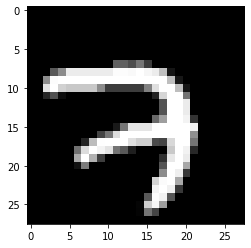

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
pixels = features[5000]
pixels = pixels.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

Επειδή το dataset είναι μεγάλο (ειδικά για τον kNN) και για το παράδειγμά μας θέλουμε να δουλέψουμε με λιγότερα δείγματα. Το ανακατεύουμε και παίρνουμε ένα μικρό αριθμό samples

In [0]:
from sklearn.utils import shuffle
sdata, starget = shuffle(features, targets, random_state=341976)
samples = 1000
data = sdata[0:samples-1,:]
target = starget[0:samples-1]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=20176)

In [8]:
from sklearn import neighbors
from sklearn.metrics import classification_report
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       0.71      1.00      0.83        40
           2       0.96      0.79      0.86        28
           3       0.80      0.83      0.81        29
           4       0.92      0.71      0.80        34
           5       0.83      0.79      0.81        24
           6       1.00      0.95      0.98        42
           7       0.69      0.96      0.81        26
           8       1.00      0.64      0.78        39
           9       0.78      0.78      0.78        40

    accuracy                           0.84       330
   macro avg       0.86      0.84      0.84       330
weighted avg       0.86      0.84      0.84       330



# Pipelines

Για την κατασκευή του μοντέλου θα βασιστούμε στην κλάση Pipeline. Επειδή οι κλάσεις εξισορρόπησης του imblearn όπως η [RandomOverSampler](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.RandomOverSampler.html) τυπικά δεν έχουν μέθοδο transform (έχουν fit_sample) η built-in Pipeline του scikit (from sklearn.pipeline import Pipeline) δεν τις δέχεται ως transformers. Θα φέρουμε την Pipeline από το imblearn (που έχει transform για τους samplers).

In [9]:
!pip install --upgrade imbalanced-learn

     |████████████████████████████████| 174kB 4.8MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [10]:
#from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = neighbors.KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])

Using TensorFlow backend.


Το pipeline συμπεριφέρεται ως ένας ενιαίος estimator. Μπορούμε να εφαρμόσουμε fit και predict.

In [11]:
pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       0.74      1.00      0.85        40
           2       0.87      0.71      0.78        28
           3       0.67      0.69      0.68        29
           4       0.86      0.71      0.77        34
           5       0.72      0.88      0.79        24
           6       0.97      0.88      0.93        42
           7       0.74      0.77      0.75        26
           8       0.96      0.62      0.75        39
           9       0.72      0.78      0.75        40

    accuracy                           0.80       330
   macro avg       0.81      0.80      0.80       330
weighted avg       0.82      0.80      0.80       330



# GridsearchCV

Στη συνέχεια θα χρησιμποιήσουμε την [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) για να βελτιστοποιήσουμε τις υπερπαραμέτρους μας. Η GridSearchCV κάνει μαζί cross-validation και grid search. Αρχικά μελετάμε το variance των μετβλητών για τη variance threshold:

In [12]:
train_variance = X_train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.88954578e+00 1.235548

 Την εισάγουμε και θέτουμε τις τιμές ορισμού των υπερπαραμέτρων:

In [0]:
from sklearn.model_selection import GridSearchCV

vthreshold = [0, 4000, 8000, 12000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = [10, 20, 30, 40, 50, 60]
k = [1, 6, 11, 21, 31, 41] # η υπερπαράμετρος του ταξινομητή

Επειδή ο χώρος αναζήτησης των βέλτιστων υπερπαραμέτρων αρχίζει να μεγαλώνει, ξαναορίζουμε την pipeline με την παράμετρο 'memory': για κάθε fold του crossvalidation και για καθε συνδυασμό υπερπαραμέτρων μετασχηματιστών, τα δεδομένα χρειάζεται να μετασχηματιστούν μία φορά και όχι για κάθε νέα τιμή υπερπαραμέτρων του εκτιμητή. 

Είναι πιθανό στο fit να σας εμφανιστούν κάποια warnings με τη χρήση του memory. Ξανατρέξτε το block του κώδικα.

In [0]:
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')

Μπορούμε να θέτουμε τιμές στις υπερπαραμέτρους των pipelines χρησιμοποιώντας τα ονόματα των estimators, "\_\_", το όνομα της υπερπαραμέτρου, "=" και τις τιμές που της δίνουμε στο grid search. Επίσης μπορούμε να θέσουμε τη μετρική της απόδοσης με την παράμετρο "scoring". Με την παράμετρο "cv" ορίζουμε τον αριθμό των folds. Για βελτιστοποίηση, μπορούμε να θέσουμε την παράμετρο n_jobs=-1 ώστε να χρησιμοποιούνται όλοι οι πυρήνες του υπολογιστή (το default είναι 1).

In [0]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=5, scoring='f1_macro', n_jobs=-1)

Το GridSearchCV είναι επίσης ένας estimator με fit και predict. Ανάλογα το search space η εκτέλεση του  GridSearchCV μπορεί να πάρει αρκετό χρόνο

In [16]:
import time
start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Συνολικός χρόνος fit και predict: 60.331032276153564 seconds
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.82      1.00      0.90        40
           2       0.92      0.86      0.89        28
           3       0.77      0.83      0.80        29
           4       0.84      0.76      0.80        34
           5       0.91      0.83      0.87        24
           6       1.00      0.98      0.99        42
           7       0.85      0.85      0.85        26
           8       0.97      0.74      0.84        39
           9       0.76      0.80      0.78        40

    accuracy                           0.86       330
   macro avg       0.87      0.86      0.86       330
weighted avg       0.87      0.86      0.86       330



Tυπώνουμε τον καλύτερο estimator και τον καλύτερο συνδυασμό υπερπαραμέτρων:

In [17]:
print(estimator.best_estimator_)
print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=8000)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sampler',
                 RandomOverSampler(random_state=None, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=11, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__n_neighbors': 11, 'pca__n_components': 20, 'selector__thresho

Η στοχαστικότητα στη διαδικασία της ταξινόμησης οφείλεται στα διαφορετικό διαχωρισμό σε folds σε κάθε run αλλά στον RandomOverSampler που επιλέγει τυχαία δείγματα κατά τη δειγματοληψία.

## Επιλογή αρχιτεκτονικής μοντέλου pipeline

Προσοχή, η βέλτιστη αρχιτεκτονική δεν είναι δεδομένη αλλά εξαρτάται από το dataset. Δοκιμαστε στο ίδιο grid, χωρίς scaler και sampler

In [18]:
pipe = Pipeline(steps=[('selector', selector),('pca', pca), ('kNN', clf)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=3, scoring='f1_macro', n_jobs=-1)
# ο estimator με βελτιστοποιημένες υπερπαραμέτρους είναι έτοιμος να κάνει prediction.
# Ωστόσο για να μην πάνε χαμένα δεδομένα (ο΄ύτε ένα fold), τον κάνουμε fit σε όλα τα δεδομένα train.
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print(classification_report(y_test, preds))
print(estimator.best_estimator_)
print(estimator.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/imblearn/pipeline.py:240: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       0.95      1.00      0.98        40
           2       1.00      0.82      0.90        28
           3       0.83      0.86      0.85        29
           4       0.84      0.79      0.82        34
           5       0.88      0.92      0.90        24
           6       1.00      1.00      1.00        42
           7       0.80      0.92      0.86        26
           8       0.94      0.79      0.86        39
           9       0.75      0.82      0.79        40

    accuracy                           0.89       330
   macro avg       0.90      0.89      0.89       330
weighted avg       0.90      0.89      0.89       330

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=40,
                     random_state=None, svd_solver='auto', t

Και φυσικά θα μπορούσαμε να έχουμε διαφορετικά αποτελέσματα εφαρμόζοντας min max scaler αντι standard scaler, undersampling αντί oversampling κοκ. Προφανώς η πιο σημαντική απόφαση στην αρχιτεκτονική του ταξινομητή είναι η επιλογή του τελικού estimator,  αν πχ βάλουμε MLP ή SVM αντί kNN, και βέβαια η βελτιστοποίηση των υπερπαραμέτρων τους.

## Progressive grid search

Στο πεδίο ορισμού των παραμέτρων, ξεκινάμε με μεγάλα διαστήματα και σχετικά λίγα βήματα. Αν διαπιστώσουμε ότι υπαρχει μια περιοχή τιμών κάποιας παραμέτρου που δίνει καλη απόδοση μπορούμε να μικρύνουμε το διάστημα του grid search γύρω της και να βάλουμε περισσότερα βήματα.

In [19]:
vthreshold = [0]
n_components = [39, 40, 41]
k = [1, 3]
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), scoring='f1_macro', n_jobs=-1)
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
print(classification_report(y_test, preds))
print(estimator.best_estimator_)
print(estimator.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       0.95      1.00      0.98        40
           2       0.96      0.82      0.88        28
           3       0.83      0.83      0.83        29
           4       0.87      0.79      0.83        34
           5       0.85      0.92      0.88        24
           6       0.98      1.00      0.99        42
           7       0.79      0.88      0.84        26
           8       0.97      0.79      0.87        39
           9       0.76      0.85      0.80        40

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.90      0.89      0.89       330

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=41,
                     random_state=None, svd_solver='auto', t

/usr/local/lib/python3.6/dist-packages/imblearn/pipeline.py:240: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)


Το περισσότερο fine grained grid search, αν δώσει καλύτερες τιμές θα έχει βελτιστοποιήσει τον εκτιμητή, αν όχι, τουλάχιστον θα επιβεβαιώσει ότι είμαστε σε ένα καλό τοπικό μέγιστο της συνάρτησης αξιολόγησης.

---

